In [4]:
import numpy as np
from numpy import linalg as LA
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler

In [5]:
df = pd.read_csv("ex_pca_data1.csv", names=['param_1', 'param_2'])
df.head()

,param_1,param_2
0,2.816848,4.818958
1,3.888824,5.100366
2,3.343234,5.893013
3,5.879734,5.521417
4,3.103919,3.857102


Text(0, 0.5, 'param 2')

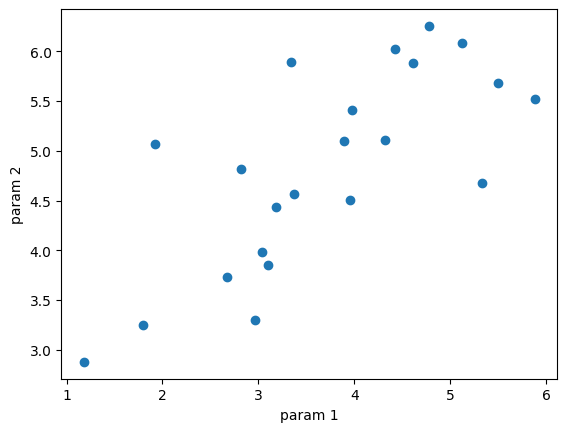

In [6]:
plt.scatter(df['param_1'], df['param_2'])
plt.xlabel('param 1')
plt.ylabel('param 2')

Text(0, 0.5, 'feature 2')

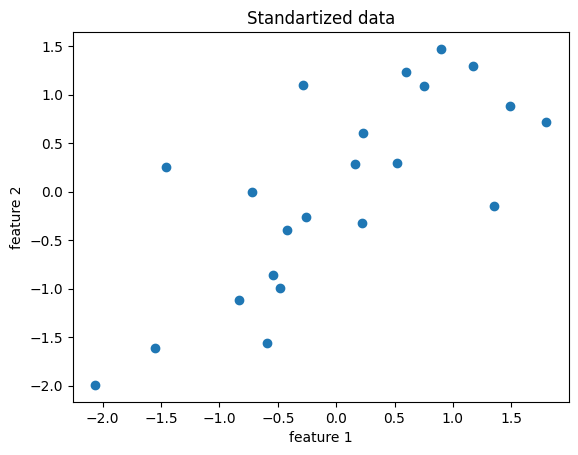

In [7]:
x =  df[['param_1', 'param_2']].values
scaler = StandardScaler()
x = scaler.fit_transform(x)
mean, std = scaler.mean_, scaler.scale_
plt.scatter(x[:,0], x[:,1])
plt.title('Standartized data')
plt.xlabel('feature 1')
plt.ylabel('feature 2')

In [12]:
m = x.shape[0]
correlation_matrix = 1/m * x.T.dot(x)
correlation_matrix

array([[1.        , 0.73017714],
       [0.73017714, 1.        ]])

In [13]:
lambds, C = LA.eig(correlation_matrix)
for i in range(len(lambds)):
    ci = C[:,i]
    lambd = lambds[i]
    print(f'Component {i} with vector {ci} has sample variance {lambd}')

Component 0 with vector [0.70710678 0.70710678] has sample variance 1.7301771369537053
Component 1 with vector [-0.70710678  0.70710678] has sample variance 0.2698228630462949


In [14]:
delt1 = lambds[0] / np.sum(lambds)
print(f'Relative proportion of variance retained when projected onto 1 component {delt1}')

Relative proportion of variance retained when projected onto 1 component 0.8650885684768527


In [15]:
C_reduce = np.copy(C[:, 0]).reshape(-1, 1)
C_reduce

array([[0.70710678],
       [0.70710678]])

In [16]:
Z = x.dot(C_reduce)

x_recovered = Z.dot(C_reduce.T)
print(f'For 1st element x = {x[0]}, x_recovered = {x_recovered[0]}')

For 1st element x = [-7.17232221e-01 -5.87586651e-04], x recovered = [-0.3589099 -0.3589099]


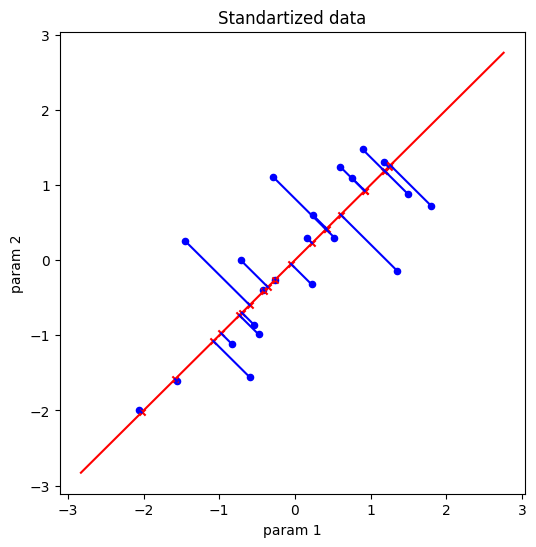

In [31]:
plt.figure(figsize=(6, 6))
plt.scatter(x[:,0], x[:,1], color='blue', s=20)
plt.scatter(x_recovered[:,0], x_recovered[:,1], marker='x', c='red', s=20)
plt.plot(C[0, 0] * np.arange(-4, 4, 0.1), C[1, 0] * np.arange(-4, 4, 0.1), color='red')
for i in range(m):
    a = 0
    plt.plot([x[i, 0], x_recovered[i, 0]],[x[i, 1], x_recovered[i, 1]], color='blue')
plt.title('Standartized data')
plt.xlabel('param 1')
plt.ylabel('param 2')
plt.show()